# Problem statement

Most customers do not post a review rating or any comment after purchasing a product which is a challenge for any ecommerce platform to perform If a company predicts whether a customer liked/disliked a product so that they can recommend more similar and related products as well as they can decide whether or not a product should be sold at their end.
This is crucial for ecommerce based company because they need to keep track of each product of each seller , so that none of products discourage their customers to come shop with them again. Moreover, if a specific product has very few rating and that too negetive, a company must not drop the product straight away, may be many customers who found the product to be useful haven't actually rated it.

Some reasons could possibly be comparing your product review with those of your competitors beforehand,gaining lots of insight about the product and saving a lot of manual data pre-processin,maintain good customer relationship with company,lend gifts, offers and deals if the company feels the customer is going to break the relation.

Objective of this case study is centered around predicting customer satisfaction with a product which can be deduced after predicting the product rating a user would rate after he makes a purchase.

# Constraints

High Accuracy 

Low latency (Rating should be known within the completion of the order)

Prone to outliers


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Data**

In [2]:
cust_data = pd.read_csv('olist_customers_dataset.csv')
geo_data =  pd.read_csv('olist_geolocation_dataset.csv')
order_items =  pd.read_csv('olist_order_items_dataset.csv')
order_payments =  pd.read_csv('olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('olist_orders_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')
sellers_data = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('olist_product_category_name_translation.csv')

# Understanding the data

**Customer data - contains information about the customer**

In [3]:
cust_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

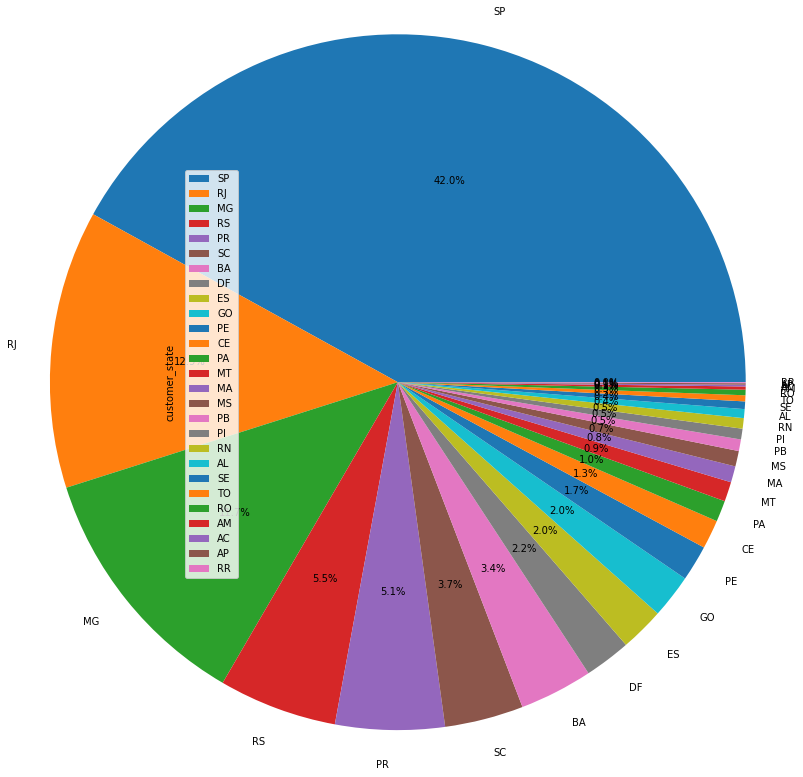

In [5]:
cust_data.customer_state.value_counts().plot(kind='pie',figsize=(10,8),autopct='%.1f%%',radius=2)
plt.legend()
plt.show()

In [6]:
#Top 10 cities with their value counts
cust_data.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

**Order_item Data ( each item in a particular order )**

In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
#checking if any null/NA present in any entry
order_items.isnull().any().any()

False

In [9]:
print('Number of sellers :',order_items.seller_id.unique().shape[0])
print('Number of unique products are : ',order_items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


**Price feature**

In [10]:
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

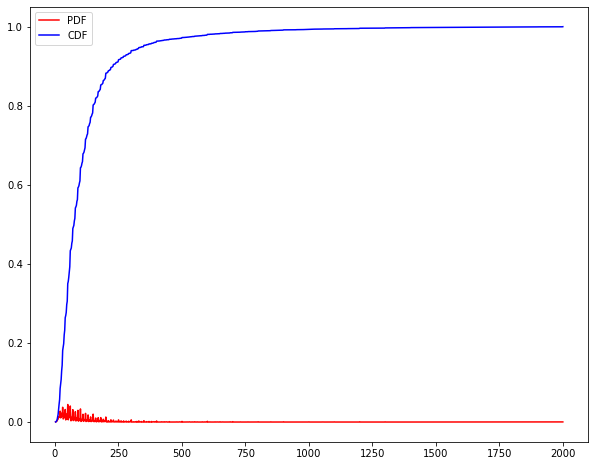

In [11]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
sata = order_items[order_items.price <= 2000]
counts, bin_edges = np.histogram(sata.price, bins=1000, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf,color='red',label='PDF')
plt.plot(bin_edges[1:], cdf,color='blue',label='CDF')
plt.legend()


plt.show();

**Observation**

1. Price is centered around 40-120 Brazilian real, so the box plot is not able separate any of the review score based on the price as hue. 

2. User rating is infact not depended soley on the price of the product.

**Order_Payments**

In [12]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Payment method Feature**

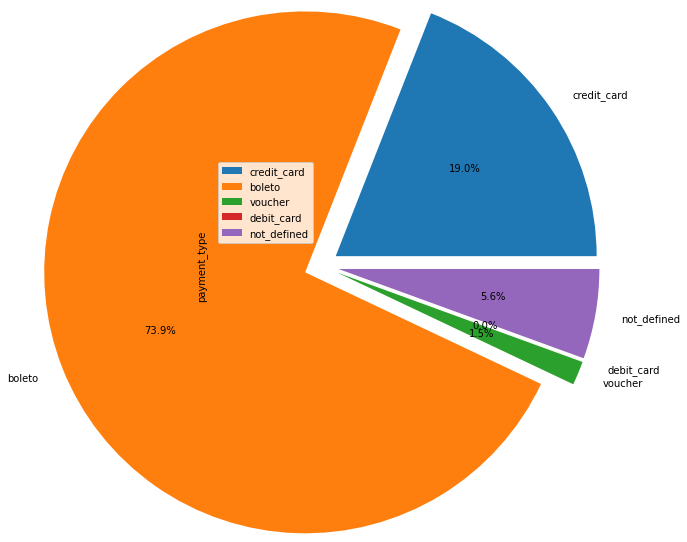

In [13]:
#Most used Payment method for orders
explode = [0.2]*5
order_payments['payment_type'].groupby(order_payments['payment_type']).count().plot(kind='pie',radius=3,labels=order_payments.payment_type.unique(),autopct='%.1f%%',explode=explode)
plt.legend()
plt.show()

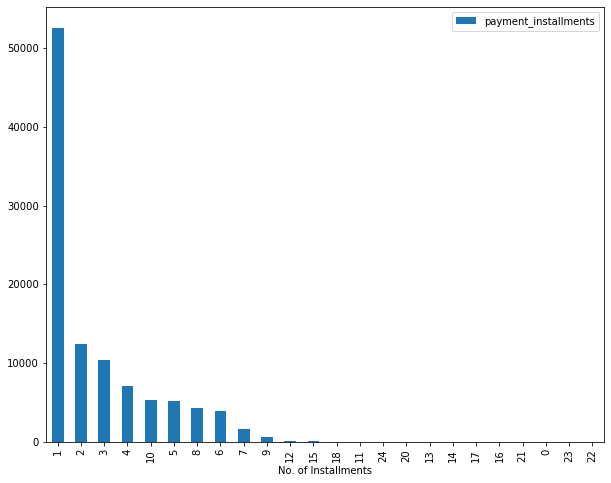

In [14]:
#number of installments feature
order_payments.payment_installments.value_counts().plot(kind = 'bar',figsize=(10,8))
plt.legend()
plt.xlabel('No. of Installments')
plt.show()

In [15]:
#checking if any null/NA present in any entry
order_payments.isnull().any().any()

False

**Observation**

1. Most customers have made the payment through vouchers i.e 73.8% and then credit card about 19.5%.
2. Number of installments majority of the time is 1, that is full payment was done. Otherwise it is not more than
    4 in most of the cases.

**Order_reviews data**

In [16]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


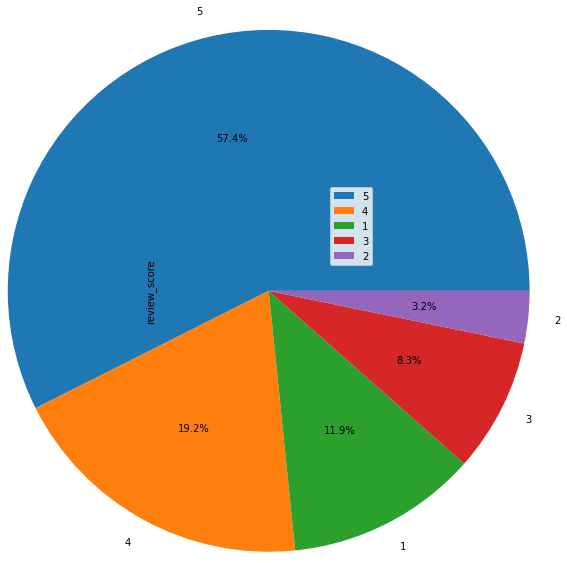

In [17]:
#pie chart for review_score
order_reviews.review_score.value_counts().plot(kind = 'pie',radius=3,autopct='%.1f%%')
plt.legend()
plt.show()

In [18]:
#how many null/missing entries are present
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Observations**

* Review_score by maximum customers is 5 star(57%) and 4star(19.2%)

*  review_comment_title and review_comment_message have lots of entires as blank or null, which is a problem. This is however xpected because most customers don't prefer to write reviews.
    
*  As the percentage of null/blank value is over 30% (here it is about 80%) , so we drop these two features.

**Orders_data**

In [19]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


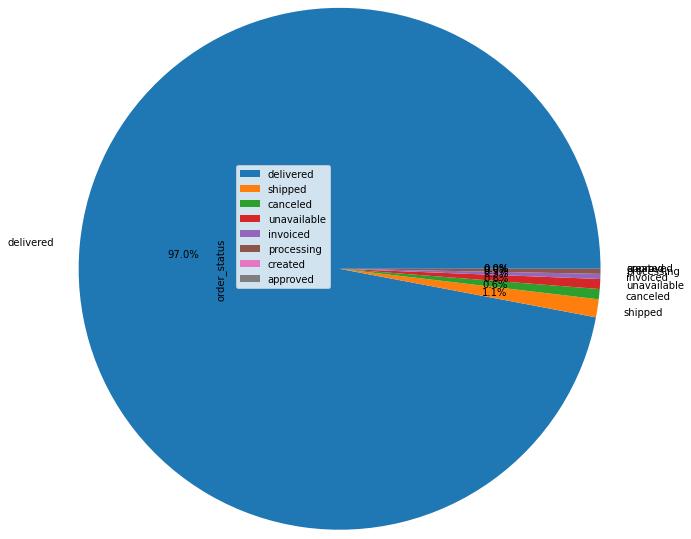

In [20]:
#order_status
order_data.order_status.value_counts().plot(kind='pie',radius=3,autopct='%.1f%%')
plt.legend()
plt.show()

In [21]:
#checking if any null/NA present in any entry
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Observations**

1. Almost 97.77% of orders are marked as delivered, some values are canceled, approved e.t.c. Note that such circumstances are very rare which shows in the data too, so this feature is of no use. We can drop it.

2. There are some orders which have missing order_delivered_carrier_date, order_delivered_customer_date and very few have order_approved_at missing.


**Products Data**

In [22]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
products_data.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

Text(0.5, 0, 'product_description_length')

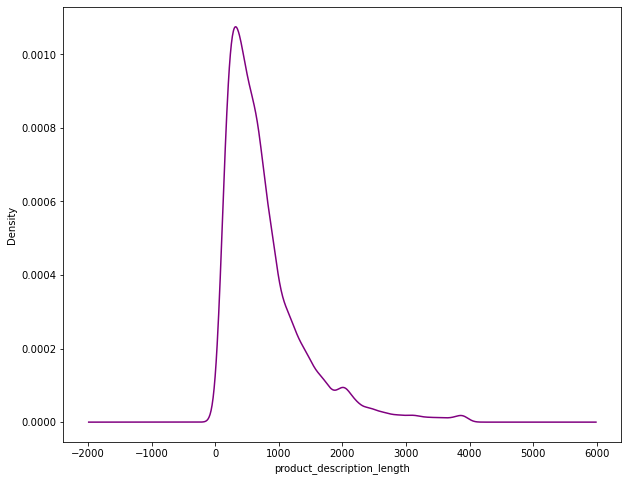

In [24]:
#Density plot of product_description_length and 
products_data.product_description_length.plot(kind='density',figsize=(10,8),color= 'purple')
plt.xlabel('product_description_length')

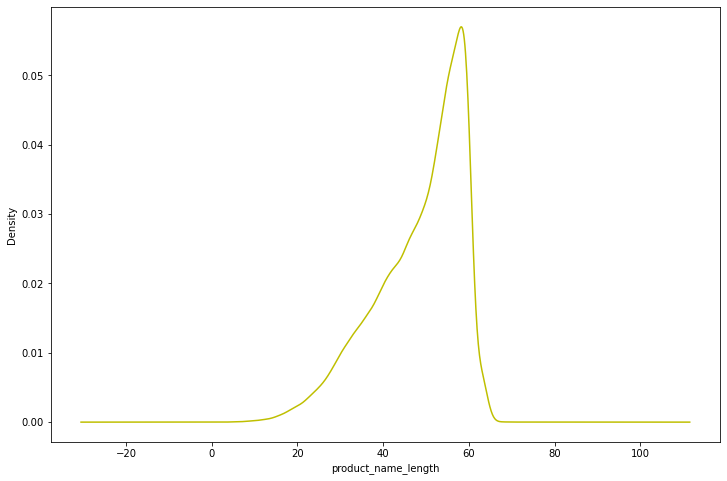

In [25]:
#Density plot of product_description_length
d = products_data.product_name_length

d.plot(kind='kde',figsize=(12,8),color= 'y')
plt.xlabel('product_name_length')
plt.show()

**PDF and CDF for product description length**

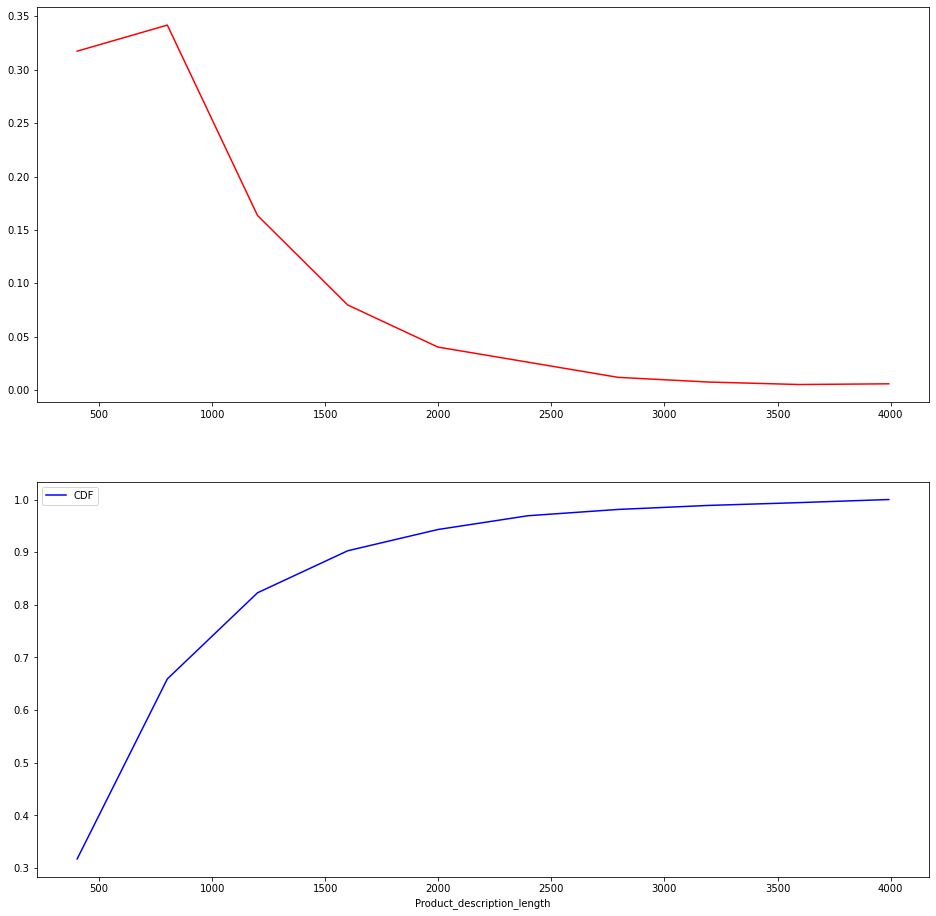

In [26]:
counts, bin_edges = np.histogram(products_data.product_description_length.dropna(), bins=10, 
                                 density = True)
fig,ax = plt.subplots(2,figsize=(16,16))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax[0].plot(bin_edges[1:],pdf,color='red',label='PDF')
ax[1].plot(bin_edges[1:], cdf,color= 'b',label="CDF")
plt.xlabel('Product_description_length')
plt.legend()
plt.show()

**Observations**

* Density plots for product_name_length is dense around (20-60) and product_description length around (0-2000) 

* Above CDF shows that about 92% of the product have product_description_length to be less than or equal to 2000.

* PDF shows that probability of getting product_description_length 500-100 have the maximum probablity.

**Sellers Data**

In [27]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


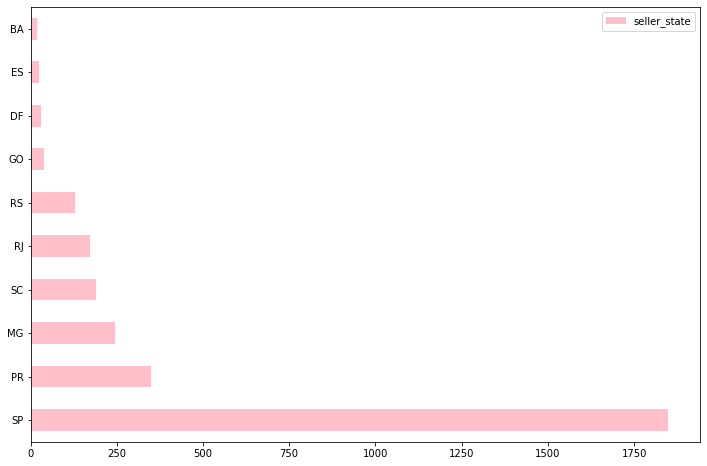

In [28]:
#top 10  seller state
sellers_data.seller_state.value_counts().sort_values(ascending=False)[:10].plot(kind='barh',color='pink',figsize=(12,8))
plt.legend()
plt.show()

In [29]:
#unique sellers
print('Number of unique sellers are: ',sellers_data.seller_id.unique().shape[0])

Number of unique sellers are:  3095


**Observations**

* There are 3095 unique sellers and most of seller are in State SP.

# Data cleaning and preprocessing

In [30]:
#renaming all the zip_code_prefix so as to make the name common in all tables inorder to perform join

geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [31]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

In [32]:
#merging all customer related data

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(104485, 26)

In [33]:
#merging all seller related data

B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [34]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(116581, 48)

In [35]:
#final data columns
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

In [36]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
zip_code_prefix_x                     0
customer_city                         0
customer_state                        0
geolocation_lat_x                   311
geolocation_lng_x                   311
geolocation_city_x                  311


In [37]:
print(data.shape[0])
data[data['order_status'] != 'delivered'].shape[0]

116581


2514

In [38]:
100 - round((2514/112863)*100,3)

97.773

**Observations**

1. There are many features having null/blank entires too , but their proportion is less than 30%, so we can simply remove all such rows.

2. Moreover, we have the product category name in a different language, so we simply rename the english version of the category names to category_name and delete the other.

3. To add on to this , we can clearly remove very detailed information about the product i.e product_description_lenght, product_name_lenght, product_weight_g, product_length_cm, product_height_cm, product_width_cm as they dont decide wheather a customer will like it or not.

4. Only feature in product section that can be useful is number of photos the product has, if it has many photos customer customer is well aware of how the product looks from all possible ways and is more certainly sure about going for it , thus increasing the chance of getting a positive rating.

5. On a similar note , product_description lenght can also act somewhat useful, because if the description of the product is detailed and long , customer is most likely to know evrey crux of the product thus increasing the high rating probability.

6. We dont clearly need latitudinal and longtuditnal info, seller_city(seller state is enough)

7. Order_approved_at is a datetime based feature which is useless, because customer is least intersted when the order was approved, because in almost all case it gets approved instantly or within some minutes or hours. It is a trivial feature.

8. As we have already removed product reviews and review titles , there is no use of review id now.

9. As we have merged all the tables into a single one, so the there is no need some primary key or id. So all id can dropped except the customer unique id which may be useful to study the customer as not all the customers are same and seller_id and product_id

In [39]:
#removing some mis filled data
data = data[data['geolocation_state_y'] == data['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)




Number of useless features as of now are :  24


**Removing all NULL values**

In [40]:
prev_size = data.shape[0]
data.dropna(how='any',inplace=True)

current_size = data.shape[0]
#no Null values now
data.isnull().values.any()
print(data.shape)
print('Only {}% of data got removed'.format(round(((prev_size - current_size)/prev_size)*100,2)))

(113152, 24)
Only 2.16% of data got removed


In [41]:
data.columns

Index(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zipCode_prefix_cust', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'zipCode_prefix_seller', 'seller_state',
       'product_category_name'],
      dtype='object')

# Exploratory Data Analysis

**Month wise sales**

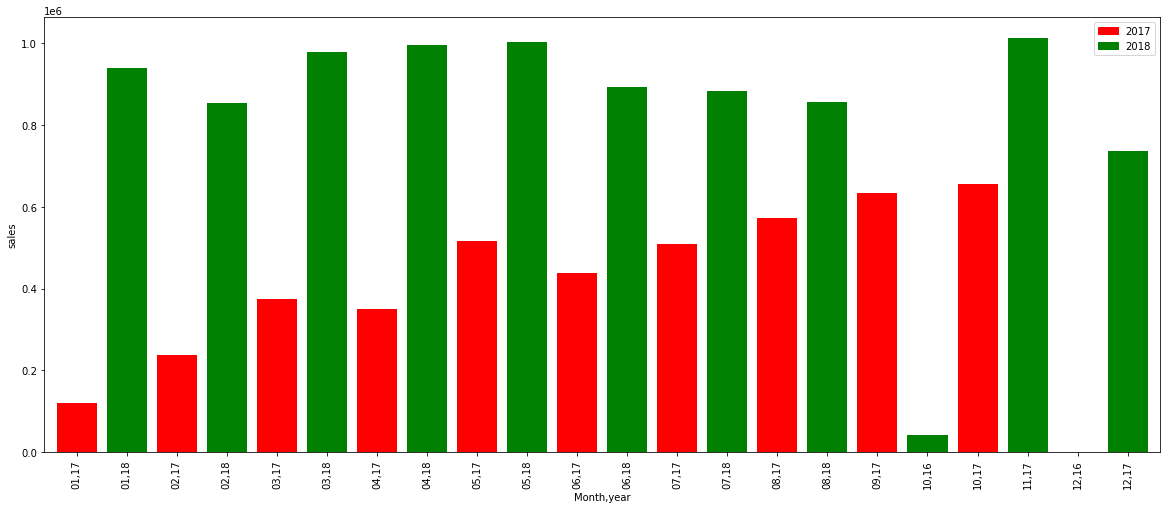

In [42]:
#understanding the growth of Olist as an ecommerce company from the range of data given to us
import matplotlib.patches as mpatches
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
monthly_sales_data = data.groupby(data['order_purchase_timestamp'].dt.strftime('%m,%y'))['price'].sum().plot(kind='bar',figsize = (20,8),color=['r','g'],width=0.8)
plt.ylabel('sales')

red_patch = mpatches.Patch(color='red', label='2017')
green_patch = mpatches.Patch(color='green', label='2018')
plt.legend(handles=[red_patch,green_patch])
plt.xlabel('Month,year')
plt.show()

**State wise sales(Top 10 states with maximum orders)**

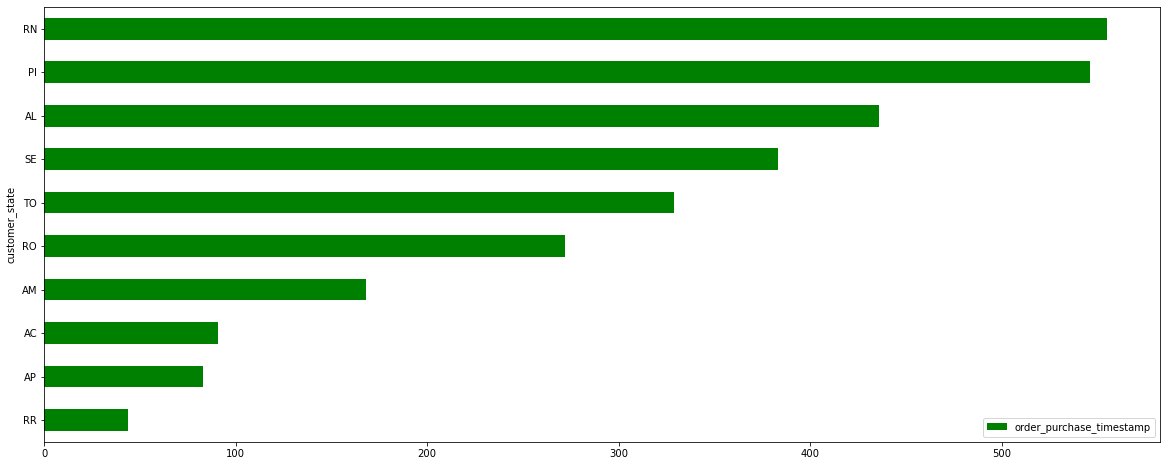

In [43]:
#top 10 states as per number of orders
data.groupby(data['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='green')
plt.legend()
plt.show()

In [44]:
print('Total unique category are ',data.product_category_name.unique().shape[0])

Total unique category are  71


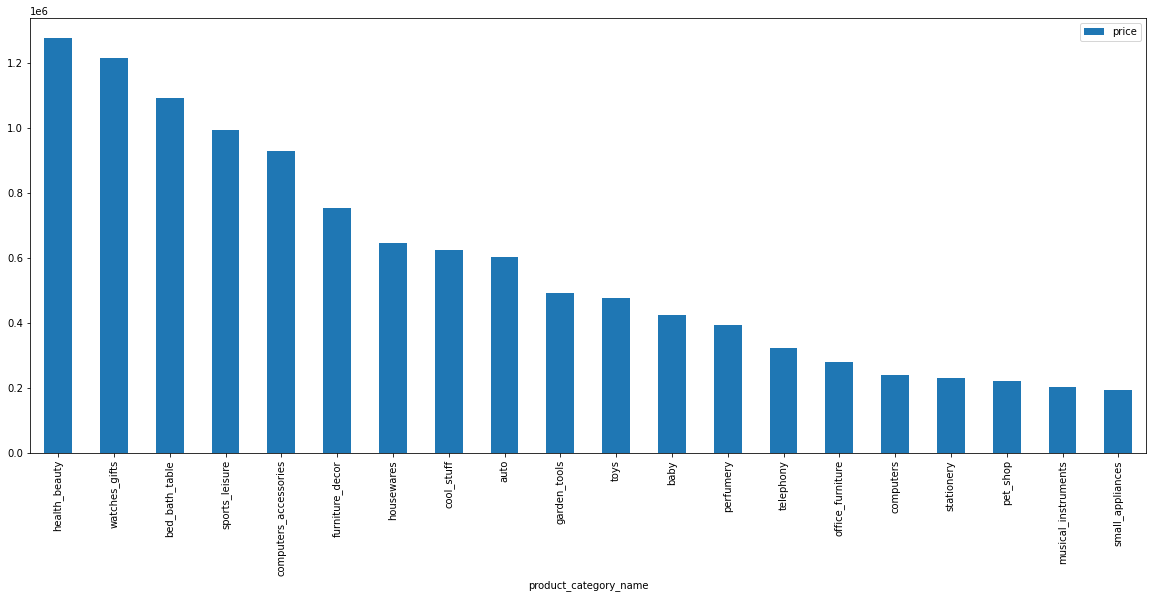

In [45]:
#category wise sales with their rating(top 20)
data.groupby(data['product_category_name'])['price'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

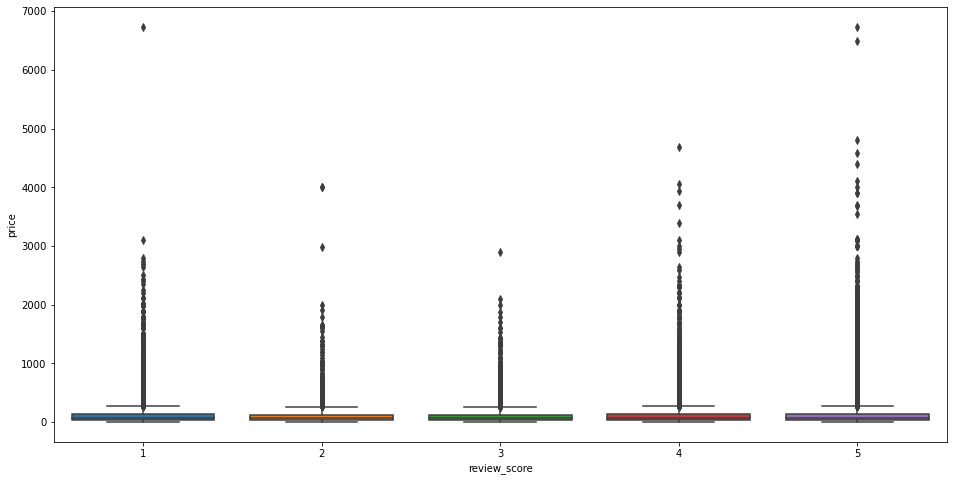

In [46]:
#Box plot for price with review score
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.show()

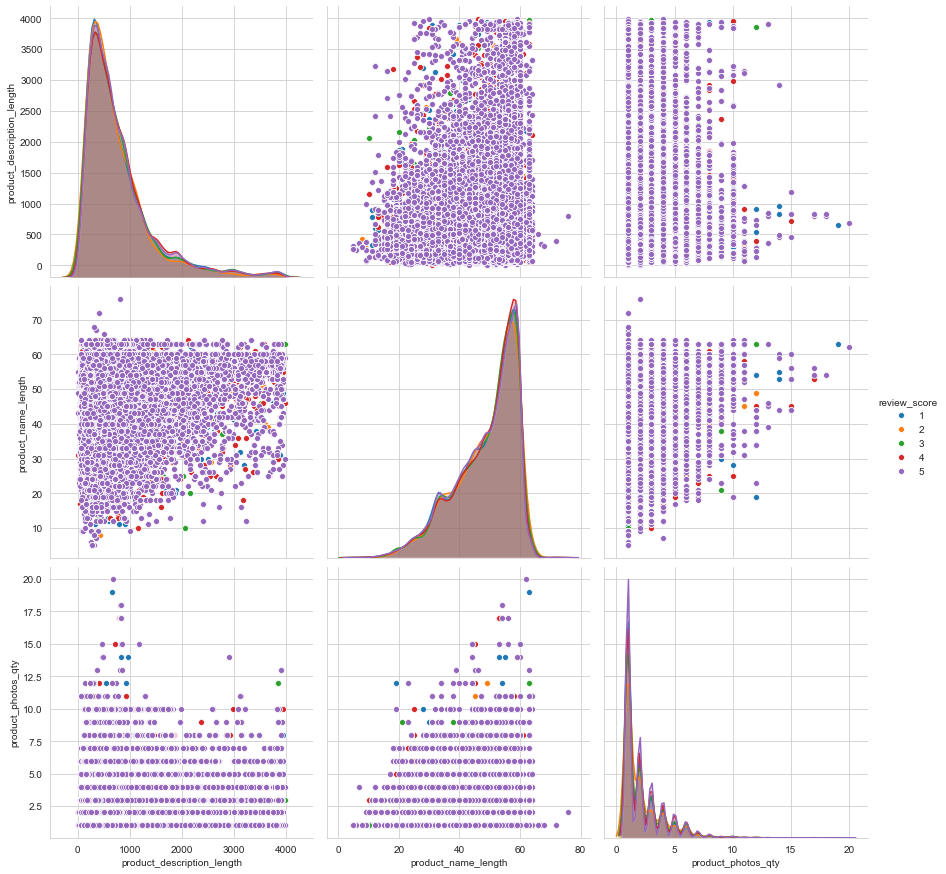

In [47]:
d = data[['product_description_length','product_name_length','product_photos_qty','review_score']]
sns.set_style("whitegrid");
sns.pairplot(d, hue="review_score", height=4);
plt.show()

**Observations**

1. Data is severly immbalaced, so scatter plot is able to separate the classes based on the selected feature

2. Point in the range (0-1500) product_description_length and product_name_length in range(30-60) have high frequency
of 5 rated review.


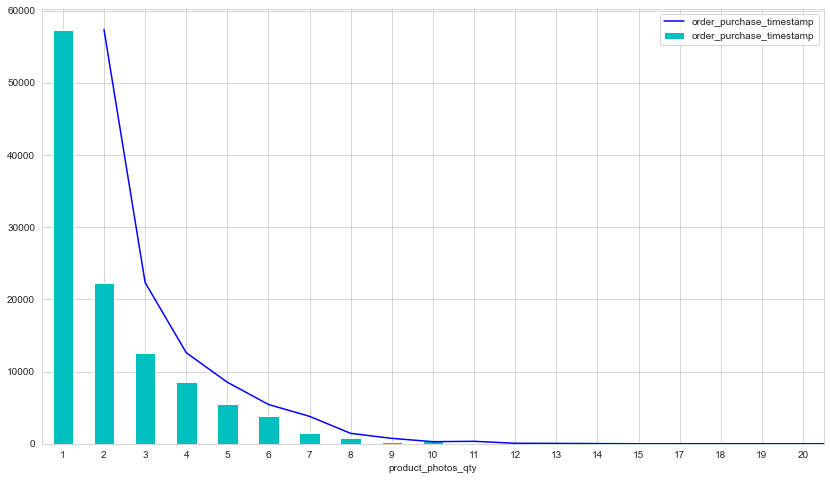

In [48]:
#plot showing relationship among number of photos and the count of number of orders
d = data.groupby(data['product_photos_qty'].astype(int))['order_purchase_timestamp'].count()
d.plot(kind='bar',figsize=(14,8),color='c')
d.plot(kind='line',figsize=(14,8),color='b')
plt.legend()
plt.show()

**Observations**

1. Density plots for the product name length shows that density around is very high around (40-60) range.
2. Number of orders w.r.t number of photos qty starts to decrease with increasing in number of photos which is not
very obvious. This may be because of other feature like product_description length or name length.

**Box plot**

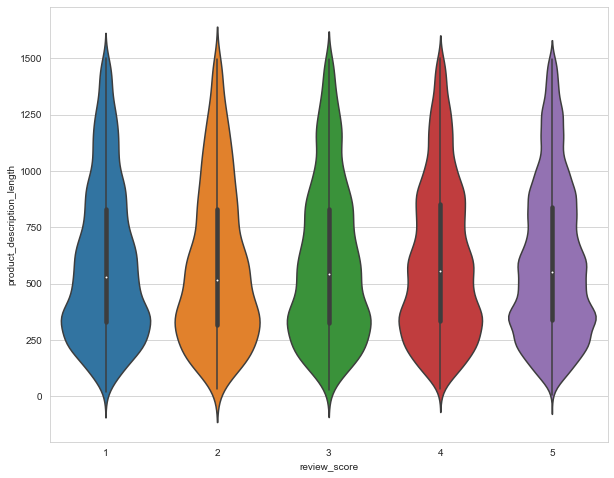

In [49]:
#taking only those points which was shown in the scatter plot
d = data[(data['product_name_length'] > 40) & (data['product_name_length'] < 60) & (data['product_description_length'] < 1500)]

plt.figure(figsize=(10,8))
#box plot
sns.violinplot(x='review_score',y='product_description_length', data=d)
plt.show()

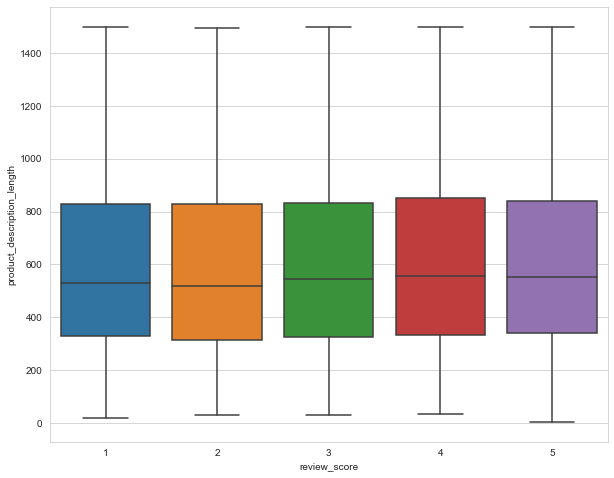

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x='review_score',y='product_description_length', data=d)
plt.show()

**Observations**

* Even after taking the most favourable data to clearly separate them out, there is still no separation.

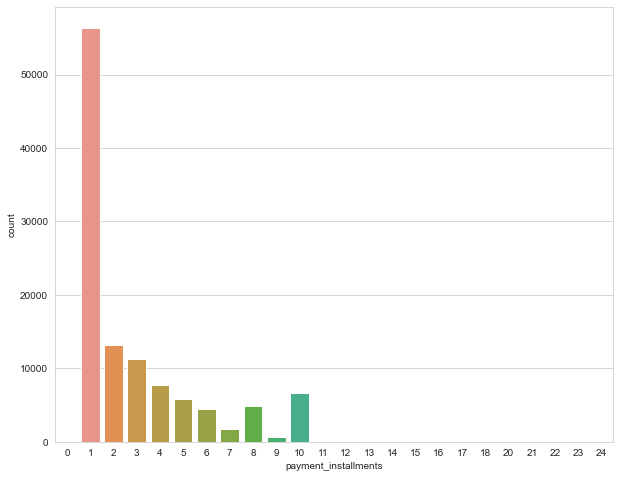

In [51]:
#payments installments
#data.payment_installments.value_counts().plot(kind = 'bar',figsize=(10,8))
plt.figure(figsize=(10,8))
sns.countplot(data.payment_installments)
plt.show()

# Feature Engineering

In [52]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date

type(data['order_delivered_customer_date'][0])

datetime.date

In [53]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
data['delivery_days'] = data['order_delivered_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['ships_in'] = data['shipping_limit_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

In [54]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.replace(" days 00:00:00.000000000","").astype(int)
data['estimated_days'] = data['estimated_days'].str.replace(" days 00:00:00.000000000","").astype(int)
data['ships_in'] = data['ships_in'].str.replace(" days 00:00:00.000000000","").astype(int)
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

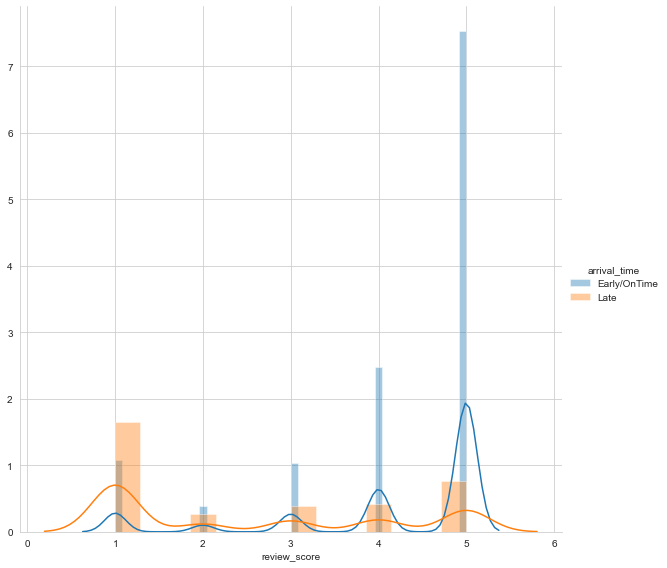

In [55]:
sns.FacetGrid(data, hue="arrival_time", height=8) \
   .map(sns.distplot, 'review_score') \
   .add_legend();
plt.show();

In [56]:
data.arrival_time.value_counts()

Early/OnTime    104285
Late              8867
Name: arrival_time, dtype: int64

**Observations**

1. Clearly from the above plot the cutomers are more likely to give an 4-5 rating if the product either arrives early or arrive on time.

2. As delivery time impacts a lot to the customer rating we will do further analysis on the delivery time.


In [57]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) | (data['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)

(625,)
Percentage of extermely late delivered packages in the dataset is: 0.552%


In [58]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()
ship_days = data.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')

#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks
data['ship_impression'] = shipping_feedback

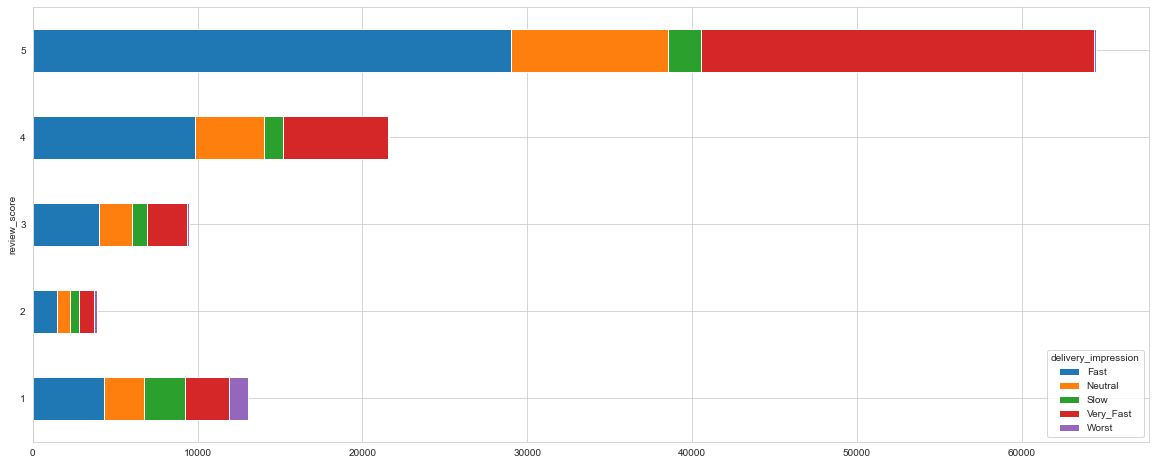

In [59]:
#Delivery Days histogram with review rating as hue
df_plot = data.groupby(['delivery_impression', 'review_score']).size().reset_index().pivot(columns='delivery_impression', index='review_score', values=0)
df_plot.plot(kind='barh',stacked=True,figsize=(20,8))

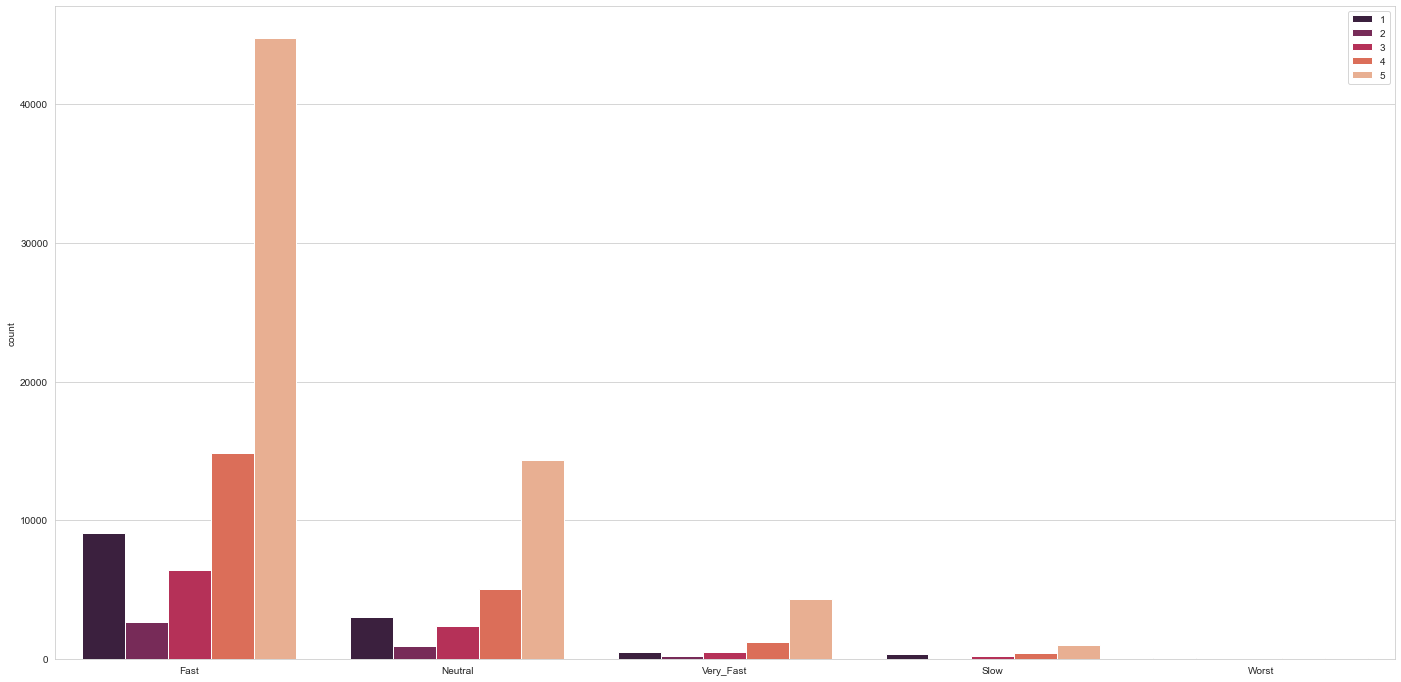

In [60]:
#Estimated Days histogram with review rating as hue
est_days = data.ship_impression.values.tolist()
review_score = data.review_score.values
fig = plt.figure(figsize=(24,12))
sns.countplot(est_days,hue=review_score,palette='rocket')
plt.show()

**Observations**


1. Majority of orders are delivered in the Fast range i.e (8-15) within 2 weeks .

2. However, next to it Very Fast range of delivery days which is (0-7) days.

3. Important observation here is customers are more likely to get things delivered in top 3 categories which are Fast,Very Fast and Neutral. From which majority of elment have rated the product to be 5 , some 4 while very few have rated less than in each of the 3 cases.

4. Delivery days is thus an important feature which can be added.


5. Moreover we have another feature which is estmated delivery date, so we also add a new feature to the dataset which is estimated delivery days. This can be some what useful, because this date is shown in advance to the user.

6. In the estimated delivery days feature though, company says out the maximum days it can take to reach. 

7. Upon observing the histograms for the estimated_days with rating as hue, similar trend of maximum rating for all the Fast Neutral and slow category. However, very fast category becomes one of the least. 


# Feature Engineering for ID based features

**Customer_ID **

In [61]:
from collections import Counter
#finding all those customers who have made multiple product purchases
order_counts = [k for k,v in Counter(data.customer_unique_id).items() if v > 1]
existing_cust = []
for i in data.customer_unique_id.values:
    if i in order_counts:
        existing_cust.append(1)
    else:
        existing_cust.append(0)
len(existing_cust)

112527

*Seller_ID*

In [62]:
print('Number of orders that are made using exisiting customer/Multiple orders are ',existing_cust.count(1))

Number of orders that are made using exisiting customer/Multiple orders are  35326


In [63]:
#seller popularity based on number of orders for each seller
max_value_count = data.seller_id.value_counts().max()
seller = data.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in data.seller_id.values:
    seller_popularity.append(seller[_id])
data['seller_popularity'] = seller_popularity
data.shape

(112527, 32)

**Observations**

* As in most of the cases customer and seller zip_code are not matching so we are dropping the featrure
 because it will increase dimenssion by 34k.

In [64]:
#dropping all id based features
data.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

#adding exisitng customer and seller_ID feature

data['existing_cust'] = existing_cust
data.shape

(112527, 28)

In [65]:
#if score> 3, set score = 1
#if score<=3, set score = 0 
data.loc[data['review_score'] < 3 ,'Score'] = 0
data.loc[data['review_score'] > 3,'Score'] = 1
#removing neutral reviews
data.drop(data[data['review_score'] == 3].index,inplace=True)
data.drop('review_score',axis=1,inplace=True)
print(data.shape)

(103030, 28)


In [66]:
#removing the datetime features as we dont need them now
data.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)
data.to_csv('preprocessed_data.csv',index=False)

In [68]:
print(data.shape)
print('Final set of features are : ')
data.columns

(103030, 23)
Final set of features are : 


Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

# Summary


* Data is heavily imbalanced having mostly positive review_score, this can impact the model so we have to perform necessiry data modelling to deal with this. 

* From above analysis it is quite conclusive that the review_score highly depends on the delivery time, however some of the rest features are also useful but we need actual model to determine feature importances.

* Other features like price , product name length, description length can be very useful feature, but as the data is immbalace it can not be simple EDA.

* We have added few more features to the dataset that coresponds to the delivery and shipment.

* We will be strict about sentiments in this analysis and consider even neutral or (3 rating) to be negetive because for product recommendation the stricter the benchmark is the better.

* Feature engineering done here might not be suffiicient to obtain the best accuracy so we might need to perform some more feature engineering.